In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

In [3]:
# Read cleaned datasets
pitchers = pd.read_csv("datasets/clean/pitchers.csv")
batters = pd.read_csv("datasets/clean/batters.csv")
plate_apps = pd.read_csv("datasets/clean/plate_apps.csv")

In [8]:
edge_subset = plate_apps.loc[plate_apps["pa_id"].str.contains("WAS202409290")]


In [12]:
edge_subset = edge_subset.loc[edge_subset["top_bot"] == 0]

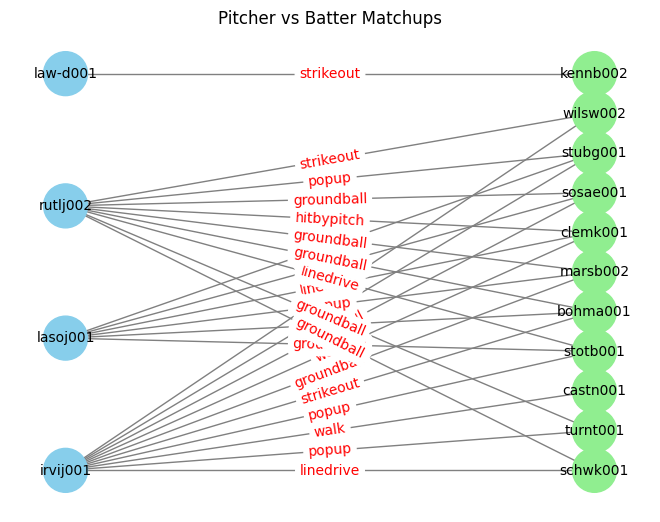

In [ ]:


# Initialize bipartite graph
B = nx.Graph()

# Add nodes with bipartite attribute
pitchers = edge_subset['pitcher'].unique()
batters = edge_subset['batter'].unique()

B.add_nodes_from(pitchers, bipartite=0)
B.add_nodes_from(batters, bipartite=1)

# Add edges with outcome as an attribute
for _, row in edge_subset.iterrows():
    B.add_edge(row['pitcher'], row['batter'], outcome=row['outcome'])

# Create a bipartite layout
pos = nx.bipartite_layout(B, pitchers)

# Draw the graph
edge_labels = nx.get_edge_attributes(B, 'outcome')
node_colors = ['skyblue' if node in pitchers else 'lightgreen' for node in B.nodes()]

nx.draw(B, pos, with_labels=True, node_color=node_colors, edge_color='gray', node_size=1000, font_size=10)
nx.draw_networkx_edge_labels(B, pos, edge_labels=edge_labels, font_color='red')

plt.title("Pitcher vs Batter Matchups")
plt.show()


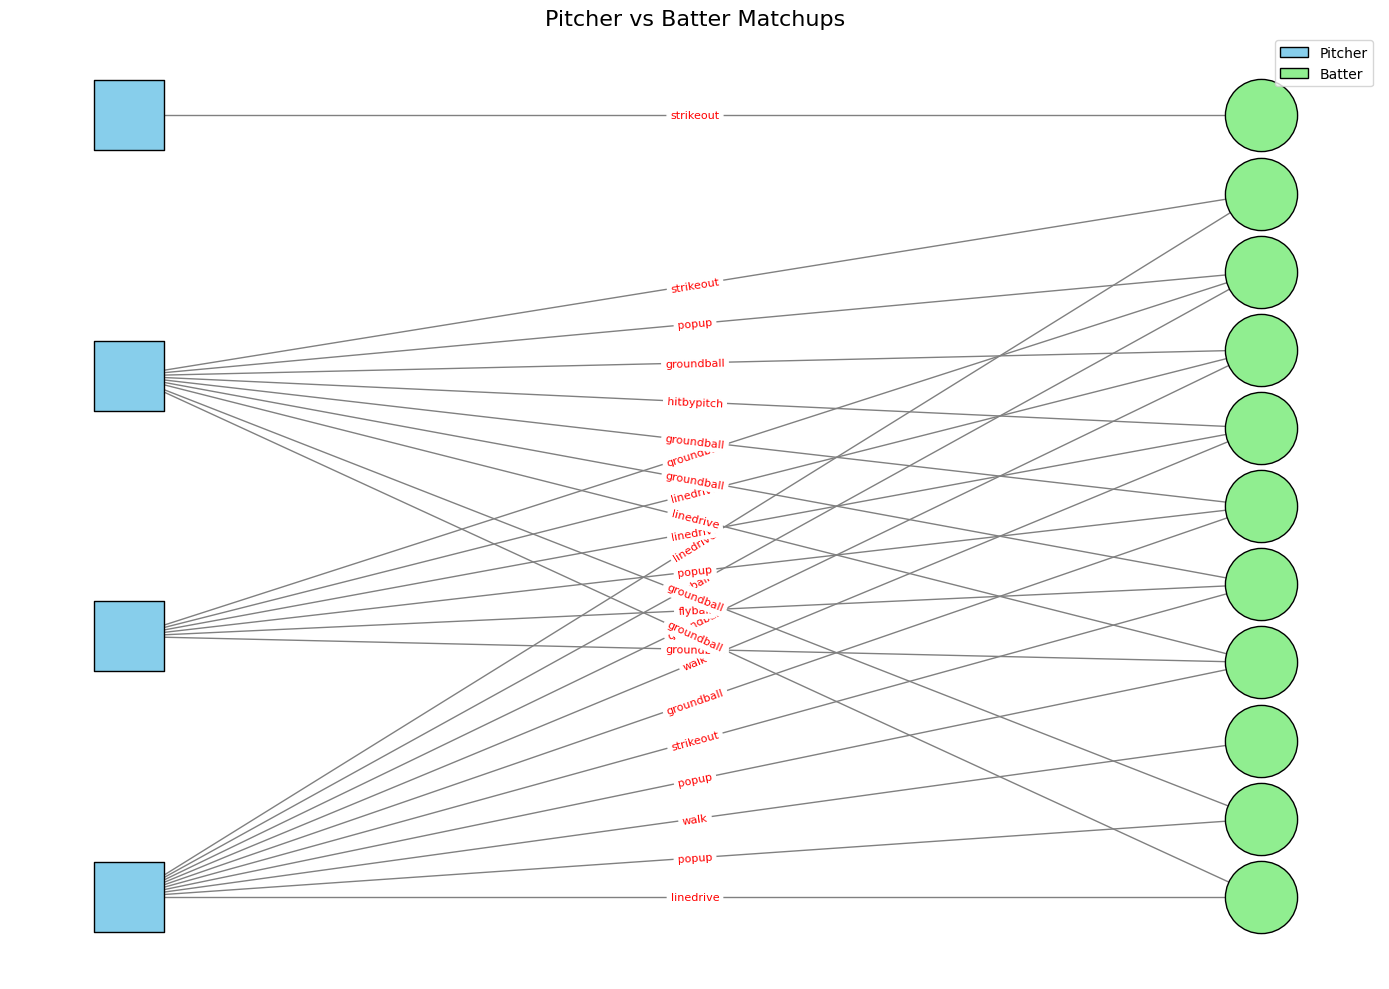

In [28]:

# Create the bipartite graph
B = nx.Graph()

pitchers = edge_subset['pitcher'].unique()
batters = edge_subset['batter'].unique()

B.add_nodes_from(pitchers, bipartite=0)
B.add_nodes_from(batters, bipartite=1)

# Add edges with outcome as an attribute (not aggregating)
for _, row in edge_subset.iterrows():
    B.add_edge(row['pitcher'], row['batter'], outcome=row['outcome'])

# Generate layout
pos = nx.bipartite_layout(B, pitchers)

# Start figure
plt.figure(figsize=(14, 10))
plt.title("Pitcher vs Batter Matchups", fontsize=16)

# Draw nodes separately for different shapes
nx.draw_networkx_nodes(B, pos,
                       nodelist=pitchers,
                       node_color='skyblue',
                       node_shape='s',
                       node_size=2500,
                       edgecolors='black')
nx.draw_networkx_nodes(B, pos,
                       nodelist=batters,
                       node_color='lightgreen',
                       node_shape='o',
                       node_size=2700,
                       edgecolors='black')


# Draw edges with curvature
nx.draw_networkx_edges(B, pos, edge_color='gray')

# Draw edge labels (outcomes)
edge_labels = nx.get_edge_attributes(B, 'outcome')
nx.draw_networkx_edge_labels(B, pos, edge_labels=edge_labels,
                              font_color='red', font_size=8, label_pos=0.5)

# Add custom legend
legend_elements = [
    Patch(facecolor='skyblue', edgecolor='black', label='Pitcher', hatch=''),
    Patch(facecolor='lightgreen', edgecolor='black', label='Batter', hatch='')
]
plt.legend(handles=legend_elements, loc='upper right')

plt.axis('off')
plt.tight_layout()
plt.show()

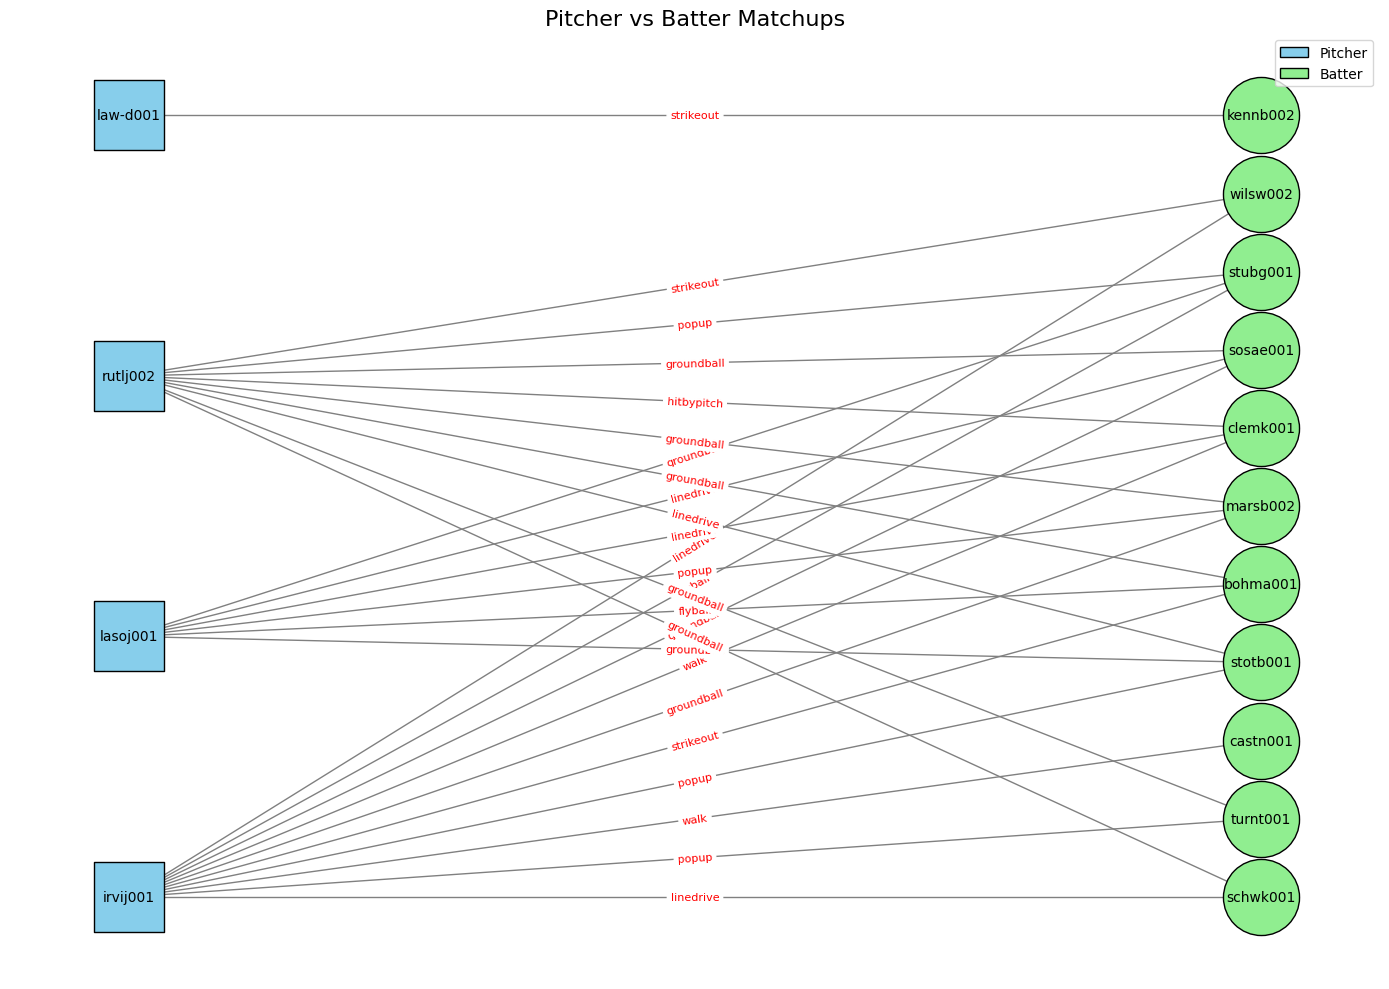

In [31]:
B = nx.Graph()

pitchers = edge_subset['pitcher'].unique()
batters = edge_subset['batter'].unique()

B.add_nodes_from(pitchers, bipartite=0)
B.add_nodes_from(batters, bipartite=1)

# Add edges with outcome as an attribute (not aggregating)
for _, row in edge_subset.iterrows():
    B.add_edge(row['pitcher'], row['batter'], outcome=row['outcome'])

# Generate layout
pos = nx.bipartite_layout(B, pitchers)

# Start figure
plt.figure(figsize=(14, 10))
plt.title("Pitcher vs Batter Matchups", fontsize=16)

# Draw nodes separately for different shapes
nx.draw_networkx_nodes(B, pos,
                       nodelist=pitchers,
                       node_color='skyblue',
                       node_shape='s',
                       node_size=2500,
                       edgecolors='black')
nx.draw_networkx_nodes(B, pos,
                       nodelist=batters,
                       node_color='lightgreen',
                       node_shape='o',
                       node_size=3000,
                       edgecolors='black')

# Draw labels
nx.draw_networkx_labels(B, pos, font_size=10)

# Draw edges with curvature
nx.draw_networkx_edges(B, pos, edge_color='gray')

# Draw edge labels (outcomes)
edge_labels = nx.get_edge_attributes(B, 'outcome')
nx.draw_networkx_edge_labels(B, pos, edge_labels=edge_labels,
                             font_color='red', font_size=8, label_pos=0.5)

# Add custom legend
legend_elements = [
    Patch(facecolor='skyblue', edgecolor='black', label='Pitcher', hatch=''),
    Patch(facecolor='lightgreen', edgecolor='black', label='Batter', hatch='')
]
plt.legend(handles=legend_elements, loc='upper right')

plt.axis('off')
plt.tight_layout()
plt.show()


In [38]:
import matplotlib.colors as mcolors
mcolors.TABLEAU_COLORS

{'tab:blue': '#1f77b4',
 'tab:orange': '#ff7f0e',
 'tab:green': '#2ca02c',
 'tab:red': '#d62728',
 'tab:purple': '#9467bd',
 'tab:brown': '#8c564b',
 'tab:pink': '#e377c2',
 'tab:gray': '#7f7f7f',
 'tab:olive': '#bcbd22',
 'tab:cyan': '#17becf'}

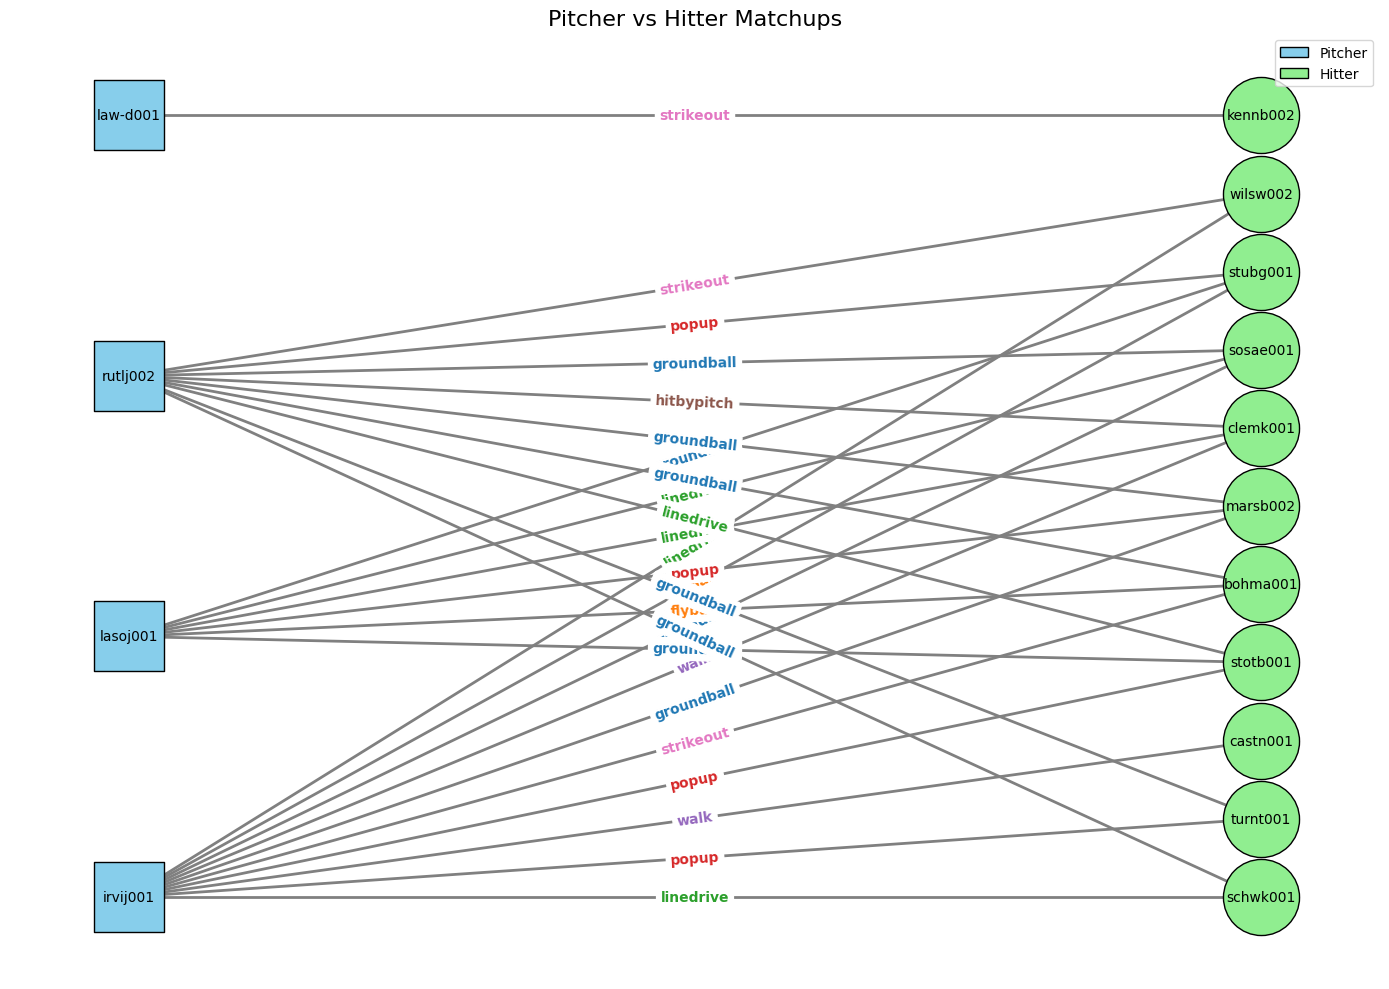

In [41]:
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.patches import Patch

# Assuming edge_subset is your DataFrame

# Create the graph
B = nx.Graph()

pitchers = edge_subset["pitcher"].unique()
batters = edge_subset["batter"].unique()

B.add_nodes_from(pitchers, bipartite=0)
B.add_nodes_from(batters, bipartite=1)

# Add edges with outcome as an attribute
for _, row in edge_subset.iterrows():
    B.add_edge(row["pitcher"], row["batter"], outcome=row["outcome"])

# Generate layout
pos = nx.bipartite_layout(B, pitchers)

outcome_colors = {
    "groundball": "tab:blue",
    "flyball": "tab:orange",
    "linedrive": "tab:green",
    "popup": "tab:red",
    "walk": "tab:purple",
    "hitbypitch": "tab:brown",
    "strikeout": "tab:pink",
    "bunt": "tab:cyan",
}


# Assign edge colors based on outcome
edge_colors = [outcome_colors[B[u][v]["outcome"]] for u, v in B.edges()]

# Start figure
plt.figure(figsize=(14, 10))
plt.title("Pitcher vs Hitter Matchups", fontsize=16)

# Draw nodes separately for different shapes
nx.draw_networkx_nodes(
    B,
    pos,
    nodelist=pitchers,
    node_color="skyblue",
    node_shape="s",
    node_size=2500,
    edgecolors="black",
)
nx.draw_networkx_nodes(
    B,
    pos,
    nodelist=batters,
    node_color="lightgreen",
    node_shape="o",
    node_size=3000,
    edgecolors="black",
)

# Draw labels
nx.draw_networkx_labels(B, pos, font_size=10)

# Draw edges with color based on outcome
nx.draw_networkx_edges(B, pos, edge_color="gray", width=2)

# Draw edge labels (outcomes)
edge_labels = nx.get_edge_attributes(B, "outcome")
for u, v, data in B.edges(data=True):
    outcome = data["outcome"]
    label = {(u, v): outcome}
    color = outcome_colors.get(outcome, "black")  # fallback to black if not found
    nx.draw_networkx_edge_labels(
        B, pos, edge_labels=label, font_color=color, font_size=10, font_weight='bold', label_pos=0.5
    )

# Add custom legend
legend_elements = [
    Patch(facecolor="skyblue", edgecolor="black", label="Pitcher", hatch=""),
    Patch(facecolor="lightgreen", edgecolor="black", label="Hitter", hatch=""),
]
plt.legend(handles=legend_elements, loc="upper right")

plt.axis("off")
plt.tight_layout()
plt.show()

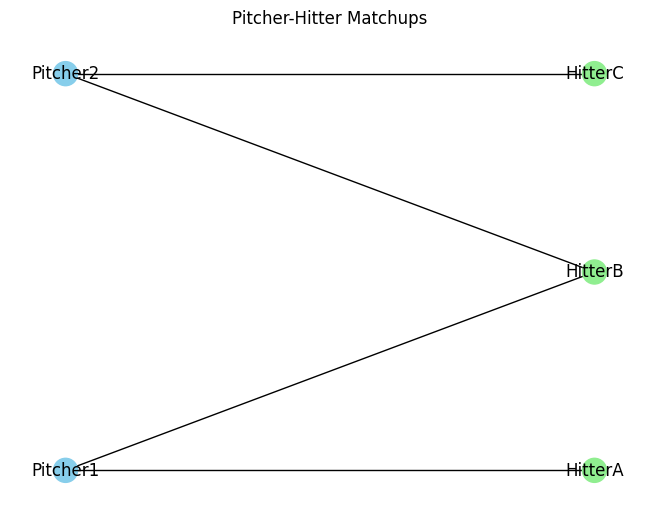

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a bipartite graph
B = nx.Graph()

# Add nodes with the node attribute "bipartite"
pitchers = ['Pitcher1', 'Pitcher2']
hitters = ['HitterA', 'HitterB', 'HitterC']

B.add_nodes_from(pitchers, bipartite=0)
B.add_nodes_from(hitters, bipartite=1)

# Add edges (matchups)
B.add_edges_from([
    ('Pitcher1', 'HitterA'),
    ('Pitcher1', 'HitterB'),
    ('Pitcher2', 'HitterB'),
    ('Pitcher2', 'HitterC')
])

# Draw the bipartite graph
pos = nx.bipartite_layout(B, pitchers)  # specify one of the node sets
nx.draw(B, pos, with_labels=True, node_color=['skyblue' if n in pitchers else 'lightgreen' for n in B.nodes()])
plt.title("Pitcher-Hitter Matchups")
plt.show()
